In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Importation des données

In [2]:
df = pd.read_excel("C:/Users/appro/Desktop/Analyse BDD ERP/analyser_erp/data/Achat-vente1606.xlsx")
df1 = pd.read_excel("C:/Users/appro/Desktop/Analyse BDD ERP/analyser_erp/data/stock23-241606.xlsx")
df2 = pd.read_excel("C:/Users/appro/Desktop/Analyse BDD ERP/analyser_erp/data/Q-SERVICE.xlsx")

## Merge stock avec achat et vente

In [3]:
df_m = df.merge(df1[['Code Article','Qte En Stock - FDM', 'Qte En Stock - FDM.1']], on='Code Article', how='left')

In [4]:
df['2023 Qté en stock'] = df_m['Qte En Stock - FDM']
df['2024 Qté en stock'] = df_m['Qte En Stock - FDM.1']

## Merge cde spécial avec df 

In [5]:
df_spe = df.merge(df2[['Code Article', '2023', '2024', '2025']], on= 'Code Article', how ='left').fillna(0)

In [6]:
df_spe['2023 Qté VE'] = df_spe['2023 Qté Vendue'] - df_spe['2023']
df_spe['2024 Qté VE'] = df_spe['2024 Qté Vendue'] - df_spe['2024']
df_spe['2025 Qté VE'] = df_spe['2025 Qté Vendue'] - df_spe['2025']

In [7]:
df_spe[df_spe['Code Article'] =='REBHX151KIT']

,Marque,Code Article,2023 Qté Reçue,2023 Qté Vendue,2023 Qté en stock,2024 Qté Reçue,2024 Qté Vendue,2024 Qté en stock,2025 Qté Reçue,2025 Qté Vendue,2025 Qté en stock,2023,2024,2025,2023 Qté VE,2024 Qté VE,2025 Qté VE
289578,REBORN,REBHX151KIT,460.0,460.0,0.0,0.0,380.0,0.0,0.0,550.0,-1190.0,460.0,640.0,550.0,0.0,-260.0,0.0


## Enlève les ligne qui contiens 'Total'

In [8]:
dfT = df[~df['Marque'].astype(str).str.contains('Total', case=True, na=False)]

In [9]:
brand_list = dfT['Marque'].unique()
brand_list.size

107

In [16]:
df_spe['Marque'].nunique()

214

In [10]:
# les pourcentage de vente par marque
(df_spe['Marque'].value_counts(normalize=True)*100).head(20)

Marque
DELPHI AUTOMOTIVE    11.046036
MEAT and Doria        8.831531
OPTIMAL               8.041620
CORTECO MEILLOR       6.114789
SNRA                  5.788441
KSTOOLS               5.016543
ELRING                4.920651
MAHLE                 4.865554
TEXTAR                3.882006
SACHS                 3.316460
VALEO                 3.187722
DAYCO                 3.157259
FARE                  3.082029
FRIGAIR               2.185632
ASSO                  1.885508
T.R.W                 1.708559
FERODO                1.625383
LUK                   1.552008
MONROE                1.523399
CLAS                  1.518101
Name: proportion, dtype: float64

## Traiter les valeur Nan en 0 de la colonnes stock

In [11]:
# remplacer les valeur Nan par 0
df_spe['2023 Qté en stock'] = df_spe['2023 Qté en stock'].fillna(0)
df_spe['2024 Qté en stock'] = df_spe['2024 Qté en stock'].fillna(0)
df_spe['2025 Qté en stock'] = df_spe['2025 Qté en stock'].fillna(0)
df_spe['2023 Qté Reçue '].replace('', 0, inplace=True)
df_spe['2023 Qté Reçue '] = df_spe['2023 Qté Reçue '].fillna(0)

C:\Users\appro\AppData\Local\Temp\ipykernel_20564\1631290330.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_spe['2023 Qté Reçue '].replace('', 0, inplace=True)


In [12]:
df_spe['2023 Qté Reçue '].isna().sum()
df_spe['2023 Qté en stock'].isna().sum()
df_spe['2024 Qté en stock'].isna().sum()
df_spe['2025 Qté en stock'].isna().sum()

np.int64(0)

## Analyser dataframe tout ce qui sont > 0 pour 2025 Qté en stock

In [13]:
# filtre les valeurs negative dans la colonnes de stock
df_filtre = df_spe[df_spe['2025 Qté en stock']>=0]

In [14]:
df_filtre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 376839 entries, 0 to 377510
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Marque             376839 non-null  object 
 1   Code Article       376839 non-null  object 
 2   2023 Qté Reçue     376839 non-null  float64
 3   2023 Qté Vendue    376839 non-null  float64
 4   2023 Qté en stock  376839 non-null  float64
 5   2024 Qté Reçue     376839 non-null  float64
 6   2024 Qté Vendue    376839 non-null  float64
 7   2024 Qté en stock  376839 non-null  float64
 8   2025 Qté Reçue     376839 non-null  float64
 9   2025 Qté Vendue    376839 non-null  float64
 10  2025 Qté en stock  376839 non-null  float64
 11  2023               376839 non-null  float64
 12  2024               376839 non-null  float64
 13  2025               376839 non-null  float64
 14  2023 Qté VE        376839 non-null  float64
 15  2024 Qté VE        376839 non-null  float64
 16  2025 Qt

## Traiter les valeur negative de la colonnes vendus

In [15]:
# Transferé les valeur negative de la colonne vendu à la colonne stock
df_filtre['2023 Qté en stock'] = df_filtre.apply(lambda x: x['2023 Qté en stock'] + abs(x['2023 Qté Vendue']) if x['2023 Qté Vendue'] < 0 else x['2023 Qté en stock'], axis=1)
df_filtre['2024 Qté en stock'] = df_filtre.apply(lambda x: x['2024 Qté en stock'] + abs(x['2024 Qté Vendue']) if x['2024 Qté Vendue'] < 0 else x['2024 Qté en stock'], axis=1)
df_filtre['2025 Qté en stock'] = df_filtre.apply(lambda x: x['2025 Qté en stock'] + abs(x['2025 Qté Vendue']) if x['2025 Qté Vendue'] < 0 else x['2025 Qté en stock'], axis=1)

C:\Users\appro\AppData\Local\Temp\ipykernel_20564\950658226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['2023 Qté en stock'] = df_filtre.apply(lambda x: x['2023 Qté en stock'] + abs(x['2023 Qté Vendue']) if x['2023 Qté Vendue'] < 0 else x['2023 Qté en stock'], axis=1)
C:\Users\appro\AppData\Local\Temp\ipykernel_20564\950658226.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['2024 Qté en stock'] = df_filtre.apply(lambda x: x['2024 Qté en stock'] + abs(x['2024 Qté Vendue']) if 

In [16]:
# Change negative values in '2025 Qté VE' to 0 and fill NaN values with 0
df_filtre['2023 Qté VE'] = df_filtre['2023 Qté VE'].clip(lower=0).fillna(0)
df_filtre['2024 Qté VE'] = df_filtre['2024 Qté VE'].clip(lower=0).fillna(0)
df_filtre['2025 Qté VE'] = df_filtre['2025 Qté VE'].clip(lower=0).fillna(0)

C:\Users\appro\AppData\Local\Temp\ipykernel_20564\254878117.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['2023 Qté VE'] = df_filtre['2023 Qté VE'].clip(lower=0).fillna(0)
C:\Users\appro\AppData\Local\Temp\ipykernel_20564\254878117.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['2024 Qté VE'] = df_filtre['2024 Qté VE'].clip(lower=0).fillna(0)
C:\Users\appro\AppData\Local\Temp\ipykernel_20564\254878117.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

In [17]:
# calculer l'achat de 2024 les cases vide
def achat_2024(row):
    if np.isnan(row['2024 Qté Reçue']) or row['2024 Qté Reçue'] == 0 or row['2024 Qté Reçue'] == '':
        return row['2024 Qté en stock'] - row['2023 Qté en stock'] + row['2024 Qté Vendue']
    else:
        return row['2024 Qté Reçue']
df_filtre['2024 Qté Reçue'] = df_filtre.apply(achat_2024, axis=1)

C:\Users\appro\AppData\Local\Temp\ipykernel_20564\991105342.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['2024 Qté Reçue'] = df_filtre.apply(achat_2024, axis=1)


In [18]:
# calculer l'achat de 2025 pour les cases vide
def achat_2025(row):
    if np.isnan(row['2025 Qté Reçue']) or row['2025 Qté Reçue'] == 0 or row['2025 Qté Reçue'] == '':
        return row['2025 Qté en stock'] - row['2024 Qté en stock'] + row['2025 Qté Vendue']
    else:
        return row['2025 Qté Reçue']
df_filtre['2025 Qté Reçue'] = df_filtre.apply(achat_2025, axis=1)

C:\Users\appro\AppData\Local\Temp\ipykernel_20564\1556998834.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre['2025 Qté Reçue'] = df_filtre.apply(achat_2025, axis=1)


In [19]:
# supprimé les ligne 'Total' et 'Inconnu'
df_filtre = df_filtre[~df_filtre['Marque'].astype(str).str.contains('Total', case=True, na=False)]
df_filtre = df_filtre[~df_filtre['Marque'].astype(str).str.contains('(Inconnu)', case=False, na=False)]

C:\Users\appro\AppData\Local\Temp\ipykernel_20564\2360877455.py:3: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtre = df_filtre[~df_filtre['Marque'].astype(str).str.contains('(Inconnu)', case=False, na=False)]


In [20]:
df_filtre.fillna(0, inplace=True)

## Calcule ventes quotidiennes

In [21]:
# 🔧 VERSION CORRIGÉE - Calculs des ventes quotidiennes
print("🔢 CALCULS CORRIGÉS DES VENTES QUOTIDIENNES")
print("=" * 50)

# 1. PÉRIODES COHÉRENTES - Jours d'ouverture réels de votre entreprise
# 🏪 Entreprise ouverte samedi matin = 5,5 jours/semaine

# CALCUL RÉEL des jours d'ouverture :
jours_par_semaine = 5.5  # Lun-Ven + Sam matin
semaines_par_an = 52
jours_feries_fermeture = 8  # Seuls les jours fériés où l'entreprise est fermée
# PAS de déduction pour congés car pris en alternance (entreprise toujours ouverte)

# Calcul précis pour votre entreprise
jours_ouverture_bruts = jours_par_semaine * semaines_par_an
jours_commerciaux = int(jours_ouverture_bruts - jours_feries_fermeture)

print(f"🏪 CALCUL SPÉCIFIQUE À VOTRE ENTREPRISE :")
print(f"   • Jours/semaine : {jours_par_semaine} (incluant samedi matin)")
print(f"   • Jours bruts/an : {jours_ouverture_bruts}")
print(f"   • Jours fériés fermés : {jours_feries_fermeture}")
print(f"   • Congés : Pris en alternance (pas de fermeture)")
print(f"   • Jours commerciaux effectifs : {jours_commerciaux}")
current_day = "2025-06-05"
jours_ecoules_2025 = (pd.to_datetime(current_day) - pd.to_datetime("2025-01-01")).days -40
print(f"📅 Jours écoulés en 2025 : {jours_ecoules_2025}")

# 2. CALCUL DES VENTES QUOTIDIENNES (périodes cohérentes)
df_filtre['ventes_quotidiennes_2023'] = df_filtre['2023 Qté VE'] / jours_commerciaux
df_filtre['ventes_quotidiennes_2024'] = df_filtre['2024 Qté VE'] / jours_commerciaux
df_filtre['ventes_quotidiennes_2025'] = df_filtre['2025 Qté VE'] / jours_ecoules_2025

# 3. MOYENNE PONDÉRÉE AJUSTÉE (moins de poids sur 2025 car données partielles)
poids_2023 = 0.2  # 25%
poids_2024 = 0.4  # 35% (année complète récente)
poids_2025 = 0.4  # 20% (données partielles)

df_filtre['ventes_quotidiennes_moyennes'] = (df_filtre['ventes_quotidiennes_2023'] * poids_2023 + 
                                             df_filtre['ventes_quotidiennes_2024'] * poids_2024 + 
                                             df_filtre['ventes_quotidiennes_2025'] * poids_2025)

# 4. ÉCART-TYPE PONDÉRÉ CORRECT
# Formule : sqrt(Σ(wi * (xi - μ)²) / Σ(wi))
poids = np.array([poids_2023, poids_2024, poids_2025])

df_filtre['ecart_type_pondere'] = np.sqrt(
    (poids_2023 * (df_filtre['ventes_quotidiennes_2023'] - df_filtre['ventes_quotidiennes_moyennes'])**2 +
     poids_2024 * (df_filtre['ventes_quotidiennes_2024'] - df_filtre['ventes_quotidiennes_moyennes'])**2 +
     poids_2025 * (df_filtre['ventes_quotidiennes_2025'] - df_filtre['ventes_quotidiennes_moyennes'])**2)
)

print(f"✅ Périodes utilisées :")
print(f"   • 2023 & 2024: {jours_commerciaux} jours commerciaux")
print(f"   • 2025: {jours_ecoules_2025} jours écoulés")
print(f"✅ Poids ajustés : 2023({poids_2023}), 2024({poids_2024}), 2025({poids_2025})")
print(f"✅ Écart-type pondéré calculé correctement")

🔢 CALCULS CORRIGÉS DES VENTES QUOTIDIENNES
🏪 CALCUL SPÉCIFIQUE À VOTRE ENTREPRISE :
   • Jours/semaine : 5.5 (incluant samedi matin)
   • Jours bruts/an : 286.0
   • Jours fériés fermés : 8
   • Congés : Pris en alternance (pas de fermeture)
   • Jours commerciaux effectifs : 278
📅 Jours écoulés en 2025 : 115
✅ Périodes utilisées :
   • 2023 & 2024: 278 jours commerciaux
   • 2025: 115 jours écoulés
✅ Poids ajustés : 2023(0.2), 2024(0.4), 2025(0.4)
✅ Écart-type pondéré calculé correctement


In [22]:
# classer le vente quotidiennes par chaque marque dans l'order decoissant
brand_sales_ranking = df_filtre.groupby('Code Article')['ventes_quotidiennes_moyennes'].mean().sort_values(ascending=False).head(20)

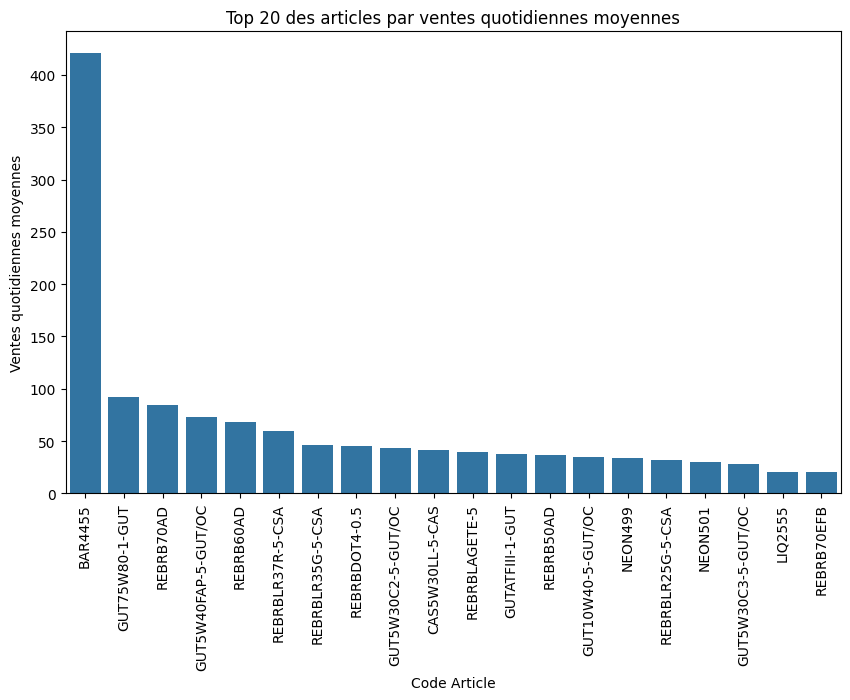

In [23]:
# diagramme top 20 artcile des ventes quotidiennes moyennes
plt.figure(figsize=(10, 6))
# Access the index for the x-axis values
sns.barplot(x=brand_sales_ranking.index, y=brand_sales_ranking.values)
plt.xlabel('Code Article') # Changed label to reflect the x-axis content
plt.ylabel('Ventes quotidiennes moyennes')
plt.title('Top 20 des articles par ventes quotidiennes moyennes') # Changed title to reflect article instead of brand
plt.xticks(rotation=90)
plt.show()

In [24]:
# 1. Trier les articles par ventes quotidiennes moyennes décroissantes
df_filtre = df_filtre.sort_values(by='ventes_quotidiennes_moyennes', ascending=False)

# 2. Calculer le pourcentage de chaque article
total_sales = df_filtre['ventes_quotidiennes_moyennes'].sum()
df_filtre['pourcentage'] = (df_filtre['ventes_quotidiennes_moyennes'] / total_sales) * 100

# 3. Calculer le pourcentage cumulé
df_filtre['cum_pourcentage'] = df_filtre['pourcentage'].cumsum()

# 4. Catégorisation ABC
def categorielle(x):
    if x <= 20:
        return 'A'
    elif 20 < x < 80:
        return 'B'
    elif 80 <= x <= 99:
        return 'C'
    else:
        return 'D'

df_filtre['categorie'] = df_filtre['cum_pourcentage'].apply(categorielle)

# 5. Afficher la répartition
print(df_filtre['categorie'].value_counts())

categorie
D    342730
C     31488
B      2172
A         6
Name: count, dtype: int64


In [25]:
cum_pourcentage = df_filtre['pourcentage'].cumsum()
cum_pourcentage

10593       9.991875
150061     12.174227
290181     14.180110
150027     15.919470
290172     17.547054
             ...    
377251    100.000000
32631     100.000000
32632     100.000000
32633     100.000000
330075    100.000000
Name: pourcentage, Length: 376396, dtype: float64

In [26]:
df_filtre.sort_values(by='pourcentage', ascending = False).head(30)

,Marque,Code Article,2023 Qté Reçue,2023 Qté Vendue,2023 Qté en stock,2024 Qté Reçue,2024 Qté Vendue,2024 Qté en stock,2025 Qté Reçue,2025 Qté Vendue,...,2024 Qté VE,2025 Qté VE,ventes_quotidiennes_2023,ventes_quotidiennes_2024,ventes_quotidiennes_2025,ventes_quotidiennes_moyennes,ecart_type_pondere,pourcentage,cum_pourcentage,categorie
10593,BARDAHL,BAR4455,55440.0,65136.0,0.0,94238.0,98016.0,0.0,66518.0,66924.0,...,98016.0,66924.0,234.302158,352.575540,581.947826,420.669778,138.584096,9.991875,9.991875,A
150061,GUTTMANN,GUT75W80-1-GUT,29052.0,26676.0,0.0,21240.0,26064.0,0.0,7056.0,10116.0,...,26064.0,10116.0,95.956835,93.755396,87.965217,91.879612,3.295629,2.182352,12.174227,A
290181,REBORN,REBRB70AD,21717.0,20108.0,0.0,19392.0,21622.0,0.0,11366.0,11176.0,...,21622.0,11176.0,72.330935,77.776978,97.182609,84.450022,10.584600,2.005882,14.180110,A
150027,GUTTMANN,GUT5W40FAP-5-GUT/OC,23008.0,22212.0,0.0,18600.0,18960.0,0.0,7040.0,8616.0,...,18960.0,8616.0,79.899281,68.201439,74.921739,73.229127,4.489457,1.739360,15.919470,A
290172,REBORN,REBRB60AD,15855.0,16413.0,0.0,17369.0,17854.0,0.0,9361.0,8920.0,...,17854.0,8920.0,59.039568,64.223022,77.565217,68.523209,7.621529,1.627584,17.547054,A
290227,REBORN,REBRBLR37R-5-CSA,12384.0,15069.0,0.0,13968.0,13666.0,0.0,8208.0,8468.0,...,13666.0,8468.0,54.205036,49.158273,73.634783,59.958230,11.317893,1.424146,18.971200,A
290223,REBORN,REBRBLR35G-5-CSA,16848.0,17142.0,0.0,9936.0,11629.0,0.0,4464.0,4939.0,...,11629.0,4939.0,61.661871,41.830935,42.947826,46.243879,7.725161,1.098399,20.069598,B
290209,REBORN,REBRBDOT4-0.5,7728.0,9072.0,0.0,12662.0,14688.0,0.0,1440.0,4973.0,...,14688.0,4973.0,32.633094,52.834532,43.243478,44.957823,7.508156,1.067852,21.137450,B
150017,GUTTMANN,GUT5W30C2-5-GUT/OC,14976.0,13204.0,0.0,9600.0,11272.0,0.0,3680.0,5142.0,...,11272.0,5142.0,47.496403,40.546763,44.713043,43.603203,2.694593,1.035676,22.173126,B
12370,CASTROL,CAS5W30LL-5-CAS,8988.0,7174.0,0.0,10368.0,12285.0,0.0,5472.0,5466.0,...,12285.0,5466.0,25.805755,44.190647,47.530435,41.849584,8.159776,0.994024,23.167150,B


## Intergrer avec tableau de prix

In [27]:
df3 = pd.read_excel("C:/Users/appro/Desktop/Analyse BDD ERP/analyser_erp/data/prix.xlsx")

In [28]:
merged_df = pd.merge(df_filtre, df3, on='Code Article', how='left')

In [29]:
merged_df.drop(columns=['Marque_y'], inplace=True)

In [30]:
merged_df

,Marque_x,Code Article,2023 Qté Reçue,2023 Qté Vendue,2023 Qté en stock,2024 Qté Reçue,2024 Qté Vendue,2024 Qté en stock,2025 Qté Reçue,2025 Qté Vendue,...,ecart_type_pondere,pourcentage,cum_pourcentage,categorie,2023 achat total,2023 vente total,2024 achat total,2024 vente total,2025 achat total,2025 vente total
0,BARDAHL,BAR4455,55440.0,65136.0,0.0,94238.0,98016.0,0.0,66518.0,66924.0,...,138.584096,9.991875,9.991875,A,86763.60,122629.656,143131.28,180182.5920,99444.26,94431.624
1,GUTTMANN,GUT75W80-1-GUT,29052.0,26676.0,0.0,21240.0,26064.0,0.0,7056.0,10116.0,...,3.295629,2.182352,12.174227,A,69161.40,84738.456,46804.32,84673.8000,15755.04,27923.136
2,REBORN,REBRB70AD,21717.0,20108.0,0.0,19392.0,21622.0,0.0,11366.0,11176.0,...,10.584600,2.005882,14.180110,A,734404.50,645467.248,608367.36,854548.6420,311064.48,380059.830
3,GUTTMANN,GUT5W40FAP-5-GUT/OC,23008.0,22212.0,0.0,18600.0,18960.0,0.0,7040.0,8616.0,...,4.489457,1.739360,15.919470,A,238620.80,298789.416,176625.60,257049.7120,64640.00,95550.776
4,REBORN,REBRB60AD,15855.0,16413.0,0.0,17369.0,17854.0,0.0,9361.0,8920.0,...,7.621529,1.627584,17.547054,A,446845.14,442651.800,441547.57,611893.8431,197897.87,259987.570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
376391,WARM UP,WUAWU-TCP1000,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,...,0.000000,0.000000,100.000000,D,NaN,NaN,NaN,NaN,NaN,NaN
376392,CORTECO MEILLOR,COR49396036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,100.000000,D,NaN,NaN,NaN,NaN,NaN,NaN
376393,CORTECO MEILLOR,COR49396037,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,100.000000,D,NaN,NaN,NaN,NaN,NaN,NaN
376394,CORTECO MEILLOR,COR49396038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,100.000000,D,NaN,NaN,NaN,NaN,NaN,NaN


## Trier les articles seulement stocké par Otto'go

In [31]:
brands = ['APLUS', 'ASSO', 'AUTOPART', 'AVA COOLING', 'BARDAHL', 'BERU', 'BRILLANT TOOLS', 'CALORSTAT', 'CASTROL', 'CHAMPION LUBRICANTS', 'CLAS', 'CORTECO MEILLOR',
          'DAYCO', 'DELPHI AUTOMOTIVE', 'EBI', 'ELRING', 'FACET', 'FERODO', 'GRAF', 'GTI SODIFAC', 'GUTTMANN', 'HIDRIA', 'Hitachi', 'INTFRADIS', 'IZAR', 'KODAK', 'KSTOOLS',
          'LIQUIMOLY', 'LUK', 'MAX BATTERIE', 'MEAT and Doria', 'MECAFILTER', 'MISFAT', 'MOBIL', 'MONROE', 'NEOLUX', 'NEXANS', 'NGK', 'OPTIMA', 'OSRAM', 'PIERBURG',
          'PROXITECH', 'REBORN', 'RYMEC', 'SACHS', 'SASIC', 'SICAD', 'SIIL INDUSTRIE', 'SNR', 'SNRA', 'SPILU', 'STABILUS', 'STECO', 'T.R.W', 'TC MATIC', 'TECHNIKIT',
          'TMI', 'TOTAL', 'TRISCAN', 'UPOLL', 'VALEO', 'Valvoline', 'WARM UP']
print(len(brands))

63


In [32]:
ottogo_stock = merged_df[merged_df['Marque_x'].isin(brands)]

In [33]:
ottogo_stock.shape

(276357, 31)

## Traiter les valeur Nan ou 0 dans le dataframe ottogo_stock

In [34]:
ottogo_stock.fillna(0, inplace=True)

C:\Users\appro\AppData\Local\Temp\ipykernel_20564\1115768637.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ottogo_stock.fillna(0, inplace=True)


In [35]:
ottogo_stock['categorie'].value_counts()

categorie
D    248510
C     25881
B      1960
A         6
Name: count, dtype: int64

In [36]:
ottogo_stock.columns

Index(['Marque_x', 'Code Article', '2023 Qté Reçue ', '2023 Qté Vendue',
       '2023 Qté en stock', '2024 Qté Reçue', '2024 Qté Vendue',
       '2024 Qté en stock', '2025 Qté Reçue', '2025 Qté Vendue',
       '2025 Qté en stock', '2023', '2024', '2025', '2023 Qté VE',
       '2024 Qté VE', '2025 Qté VE', 'ventes_quotidiennes_2023',
       'ventes_quotidiennes_2024', 'ventes_quotidiennes_2025',
       'ventes_quotidiennes_moyennes', 'ecart_type_pondere', 'pourcentage',
       'cum_pourcentage', 'categorie', '2023 achat total', '2023 vente total',
       '2024 achat total', '2024 vente total', '2025 achat total',
       '2025 vente total'],
      dtype='object')

In [37]:
columns_to_check = ['2024 Qté Reçue', '2024 Qté Vendue', '2024 Qté en stock', '2025 Qté Reçue', '2025 Qté Vendue', 
                    '2023 achat total', '2023 vente total', '2024 achat total', '2024 vente total', '2025 achat total', 
                    '2025 vente total', '2025 Qté en stock']

In [39]:
# Check if all values in the columns_to_check are 0
df_non_null = ottogo_stock[~(ottogo_stock[columns_to_check] ==0).all(axis=1)]


## Calcule les marges

In [40]:
df_non_null = df_non_null.copy()  # Ajoutez ceci avant les calculs

for annee in ['2023', '2024', '2025']:
    vente_total = f"{annee} vente total"
    achat_total = f"{annee} achat total"
    qte_vendue = f"{annee} Qté Vendue"
    qte_recue = f"{annee} Qté Reçue" if annee != '2023' else "2023 Qté Reçue "  # attention à l'espace
    qte_ve = f"{annee} Qté VE"

    df_non_null[f"marge/pcs {annee}"] = (df_non_null[vente_total] / df_non_null[qte_vendue].replace(0, np.nan)) - (df_non_null[achat_total] / df_non_null[qte_recue].replace(0, np.nan))
    df_non_null[f"marge/pcs {annee}"] = df_non_null[f"marge/pcs {annee}"].fillna(0)
    df_non_null[f"marge moyen {annee}"] = df_non_null[f"marge/pcs {annee}"] * df_non_null[qte_ve].fillna(0)

    df_non_null[f"marge total {annee}"] = df_non_null[vente_total] - df_non_null[achat_total] 

In [41]:
current_day = '2025-06-05'
days = (pd.to_datetime(current_day) - pd.to_datetime("2025-01-01")).days +1
df_non_null['marge prevu 2025'] = (df_non_null['marge moyen 2025']*(270/days)).fillna(0)

In [42]:
df_non_null['ratio_rotation_2025'] = np.where(df_non_null['2025 Qté en stock'] > 0, df_non_null['2025 Qté Vendue'] / df_non_null['2025 Qté en stock'], 0)
#df_non_null['jours_stock_2025'] = np.where(df_non_null['ratio_rotation_2025'] > 0, 365 / df_non_null['ratio_rotation_2025'],999)
#df_non_null['jours_stock_2025'] = np.minimum(df_non_null['jours_stock_2025'],-999)
df_non_null['valeur_stock_2025'] = (df_non_null['2025 Qté en stock']) * abs(df_non_null['2025 achat total']/df_non_null['2025 Qté Reçue'])
df_non_null['valeur_stock_2025'] = df_non_null['valeur_stock_2025'].fillna(0)

In [43]:
df_non_null.shape

(56345, 43)

## Classement top 2000 CA, QTE, Profit

In [44]:
# Classement des articles selon différents critères
classements = {
    'CA 2024': '2024 vente total',
    'QTE 2024': 'pourcentage',
    'Profit 2024': 'marge total 2024'
}

for nom_rang, colonne in classements.items():
    df_non_null[nom_rang] = df_non_null[colonne].rank(ascending=False, method='first').astype(int)

# Critères de tri pour les top 2000
top_criteres = [
    ('ratio_rotation_2025', False),
    ('CA 2024', True),
    ('QTE 2024', True),
    ('Profit 2024', True)
]

# Sélectionner les top 2000 pour chaque critère
top_dfs = [
    df_non_null.sort_values(by=col, ascending=asc).head(2000)
    for col, asc in top_criteres
]

# Fusionner et supprimer les doublons
df_non_null = pd.concat(top_dfs).drop_duplicates(subset='Code Article', keep='first')

In [45]:
df_non_null.shape

(4957, 46)

In [46]:
df_non_null[df_non_null['Code Article'] == 'APL13086AP']

,Marque_x,Code Article,2023 Qté Reçue,2023 Qté Vendue,2023 Qté en stock,2024 Qté Reçue,2024 Qté Vendue,2024 Qté en stock,2025 Qté Reçue,2025 Qté Vendue,...,marge total 2024,marge/pcs 2025,marge moyen 2025,marge total 2025,marge prevu 2025,ratio_rotation_2025,valeur_stock_2025,CA 2024,QTE 2024,Profit 2024
117,APLUS,APL13086AP,0.0,0.0,0.0,0.0,0.0,0.0,1026.0,1102.0,...,0.0,1.981869,2184.02,2351.3,3780.034615,6.8875,352.168421,21593,108,15188


In [47]:
# les constente
z=1.65
lead_time = 21
forcast = 30

df_non_null['stock_secu'] = z* df_non_null['ecart_type_pondere'] * np.sqrt(lead_time)
df_non_null['seuil_cde'] = (df_non_null['ventes_quotidiennes_moyennes'] * lead_time) + df_non_null['stock_secu']

# qté conseil
df_non_null['cde_conseil'] = np.where(
    df_non_null['2025 Qté en stock'] <= df_non_null['seuil_cde'],
    np.maximum(0, (df_non_null['ventes_quotidiennes_moyennes'] * forcast) + df_non_null['stock_secu'] - df_non_null['2025 Qté en stock']),
    0  )

In [48]:
seuil_75 = np.quantile(df_non_null['ratio_rotation_2025'], 0.75)
median = np.median(df_non_null['ratio_rotation_2025'])

conditions = [
    df_non_null['ratio_rotation_2025'] >= seuil_75,
    (df_non_null['ratio_rotation_2025'] >= median) & (df_non_null['ratio_rotation_2025'] < seuil_75),
    df_non_null['ratio_rotation_2025'] < median
]

choices = ['élevé', 'moyen', 'faible']

df_non_null['ratio_statut'] = np.select(conditions, choices, default='faible')

In [49]:
df_non_null['risque_rup'] = np.where(
    (df_non_null['2025 Qté en stock'] == 0) & (df_non_null['ventes_quotidiennes_moyennes'] > 0),
    'Urgent',
    np.where(
        df_non_null['2025 Qté en stock'] < df_non_null['stock_secu'],
        'Besoin de réapprovisionner',
        'Inventaire adéquat'
    )
)

In [50]:
df_non_null['risque_rup'].value_counts()

risque_rup
Inventaire adéquat            4047
Urgent                         824
Besoin de réapprovisionner      86
Name: count, dtype: int64

In [51]:
df_non_null.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4957 entries, 9 to 22377
Data columns (total 51 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Marque_x                      4957 non-null   object 
 1   Code Article                  4957 non-null   object 
 2   2023 Qté Reçue                4957 non-null   float64
 3   2023 Qté Vendue               4957 non-null   float64
 4   2023 Qté en stock             4957 non-null   float64
 5   2024 Qté Reçue                4957 non-null   float64
 6   2024 Qté Vendue               4957 non-null   float64
 7   2024 Qté en stock             4957 non-null   float64
 8   2025 Qté Reçue                4957 non-null   float64
 9   2025 Qté Vendue               4957 non-null   float64
 10  2025 Qté en stock             4957 non-null   float64
 11  2023                          4957 non-null   float64
 12  2024                          4957 non-null   float64
 13  2025   

## Identifier les marques perdus

In [52]:
a1=df_non_null['Marque_x'].unique().tolist()

In [53]:
set1 = set(df_non_null['Marque_x'])
set2 = set(brands)

In [54]:
dff1 = set1 - set2
dff2 = set2 - set1
different_words = dff1.union(dff2)
different_words

{'INTFRADIS', 'OPTIMA', 'SASIC', 'TC MATIC', 'TRISCAN', 'Valvoline'}

In [55]:
df_non_null['Marque_x'].value_counts(normalize=True)*100

Marque_x
DELPHI AUTOMOTIVE      14.181965
VALEO                  11.882187
GUTTMANN                8.896510
SNRA                    8.694775
MECAFILTER              6.475691
DAYCO                   6.173089
LUK                     5.345975
RYMEC                   4.155739
APLUS                   3.832963
NGK                     3.691749
LIQUIMOLY               3.046197
TECHNIKIT               2.198911
SNR                     1.896308
KSTOOLS                 1.855961
T.R.W                   1.815614
ELRING                  1.593706
ASSO                    1.573532
REBORN                  1.472665
TMI                     1.129716
CORTECO MEILLOR         0.786766
MONROE                  0.726246
GTI SODIFAC             0.706072
PIERBURG                0.685899
MISFAT                  0.645552
CHAMPION LUBRICANTS     0.645552
NEOLUX                  0.625378
SIIL INDUSTRIE          0.504337
PROXITECH               0.484164
CLAS                    0.463990
CALORSTAT               0.443817
M

In [56]:
df_non_null.to_excel('df_non_null.xlsx', index=False)

In [57]:
df_non_null.to_csv('df_non_null.csv', index=True)